In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
df = pd.read_csv('data/sp500sub.csv',
                 index_col='Date',
                 parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [25]:
!head data/sp500sub.csv

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.079999923706056,10.15999984741211,10.15999984741211,2889600.0,INCY

In [26]:
goog=df[df["Name"]=='GOOG'][["Close"]].copy()

<AxesSubplot:xlabel='Date'>

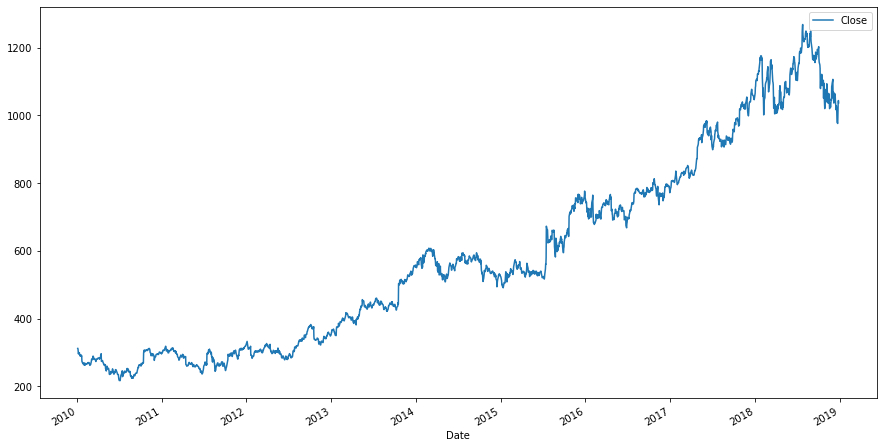

In [27]:
goog.plot(figsize=(15,8))

In [28]:
goog["LogClose"]=np.log(goog["Close"])

<AxesSubplot:xlabel='Date'>

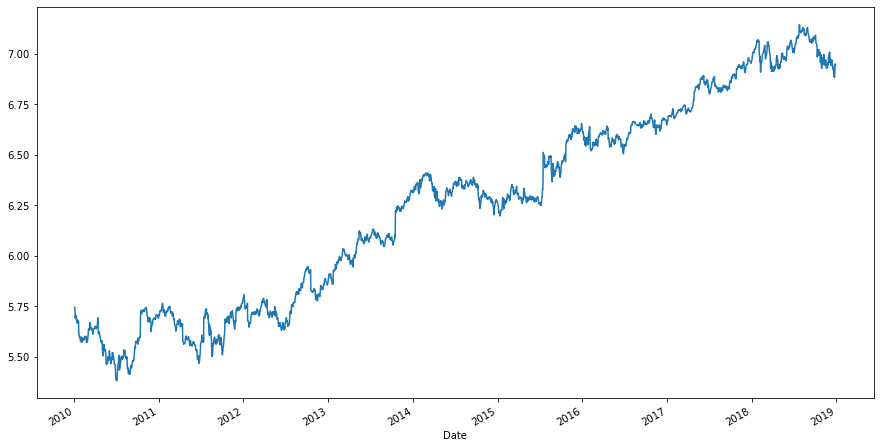

In [29]:
goog["LogClose"].plot(figsize=(15,8))

In [30]:
N_test = 30
train=goog.iloc[:-N_test]
test=goog.iloc[-N_test:]

In [34]:
train_idx=goog.index <=train.index[-1]
test_idx=goog.index >train.index[-1]

In [35]:
hw=ExponentialSmoothing(train['LogClose'],
                        initialization_method='legacy-heuristic',
                        trend='add',
                        seasonal=None,
                        seasonal_periods=12)
res=hw.fit()

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [36]:
goog.loc[train_idx,"HoltWinterTrain"]=res.fittedvalues
goog.loc[test_idx,"HoltWinterTest"]=res.forecast(N_test).to_numpy()

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

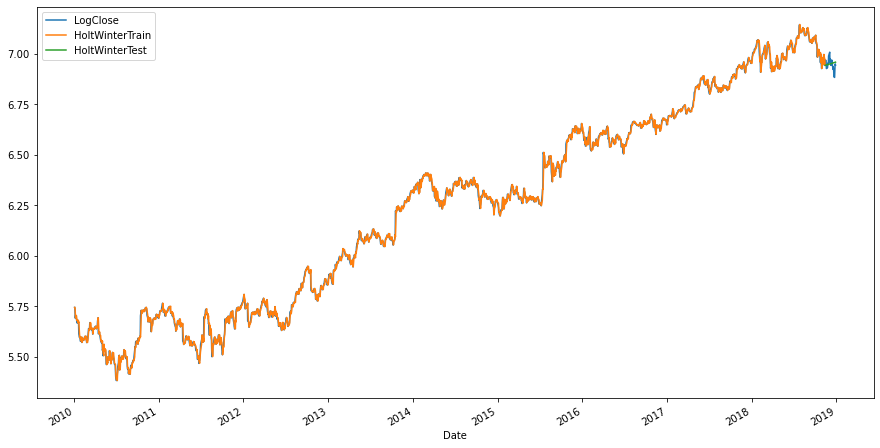

In [38]:
goog[["LogClose","HoltWinterTrain","HoltWinterTest"]].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

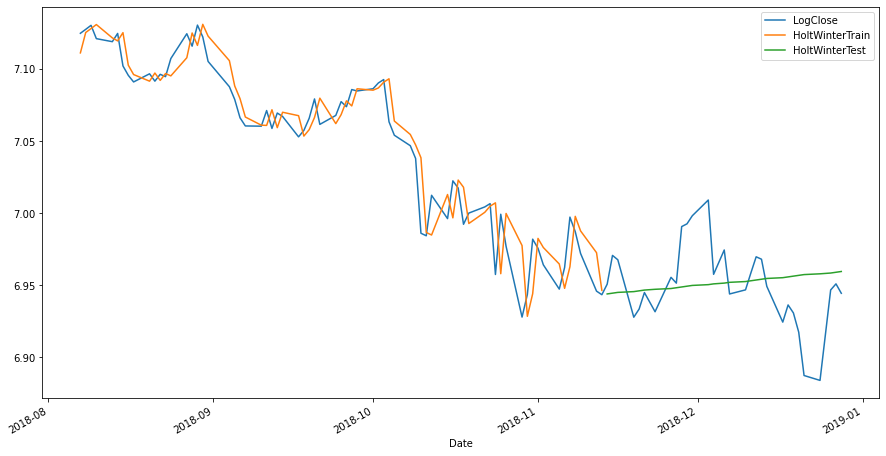

In [39]:
cols=["LogClose","HoltWinterTrain","HoltWinterTest"]

goog.iloc[-100:][cols].plot(figsize=(15,8))

In [45]:
r2_score(train["LogClose"],res.fittedvalues)


0.9990418372244649

In [46]:
r2_score(test["LogClose"],res.forecast(N_test))

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


-0.15876524683683457